<a href="https://colab.research.google.com/github/Kirankumar2025/Kirankumar2025/blob/main/Mcd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Now you can use regular Python code to access files
# For example, to list files in a specific directory in your Google Drive:
import os

file_path = '/content/drive/My Drive/database/menu.csv'



with open(file_path, 'r') as file:
    content = file.read()
    print(content)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13,20,5,25,0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8,12,3,15,0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23,35,8,42,0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28,43,10,52,0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
Breakfast,Sausage McMuffin with Egg Whites

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# menu.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/drive/My Drive/database/menu.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'menu.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 260 rows and 24 columns


In [ ]:
df1.head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

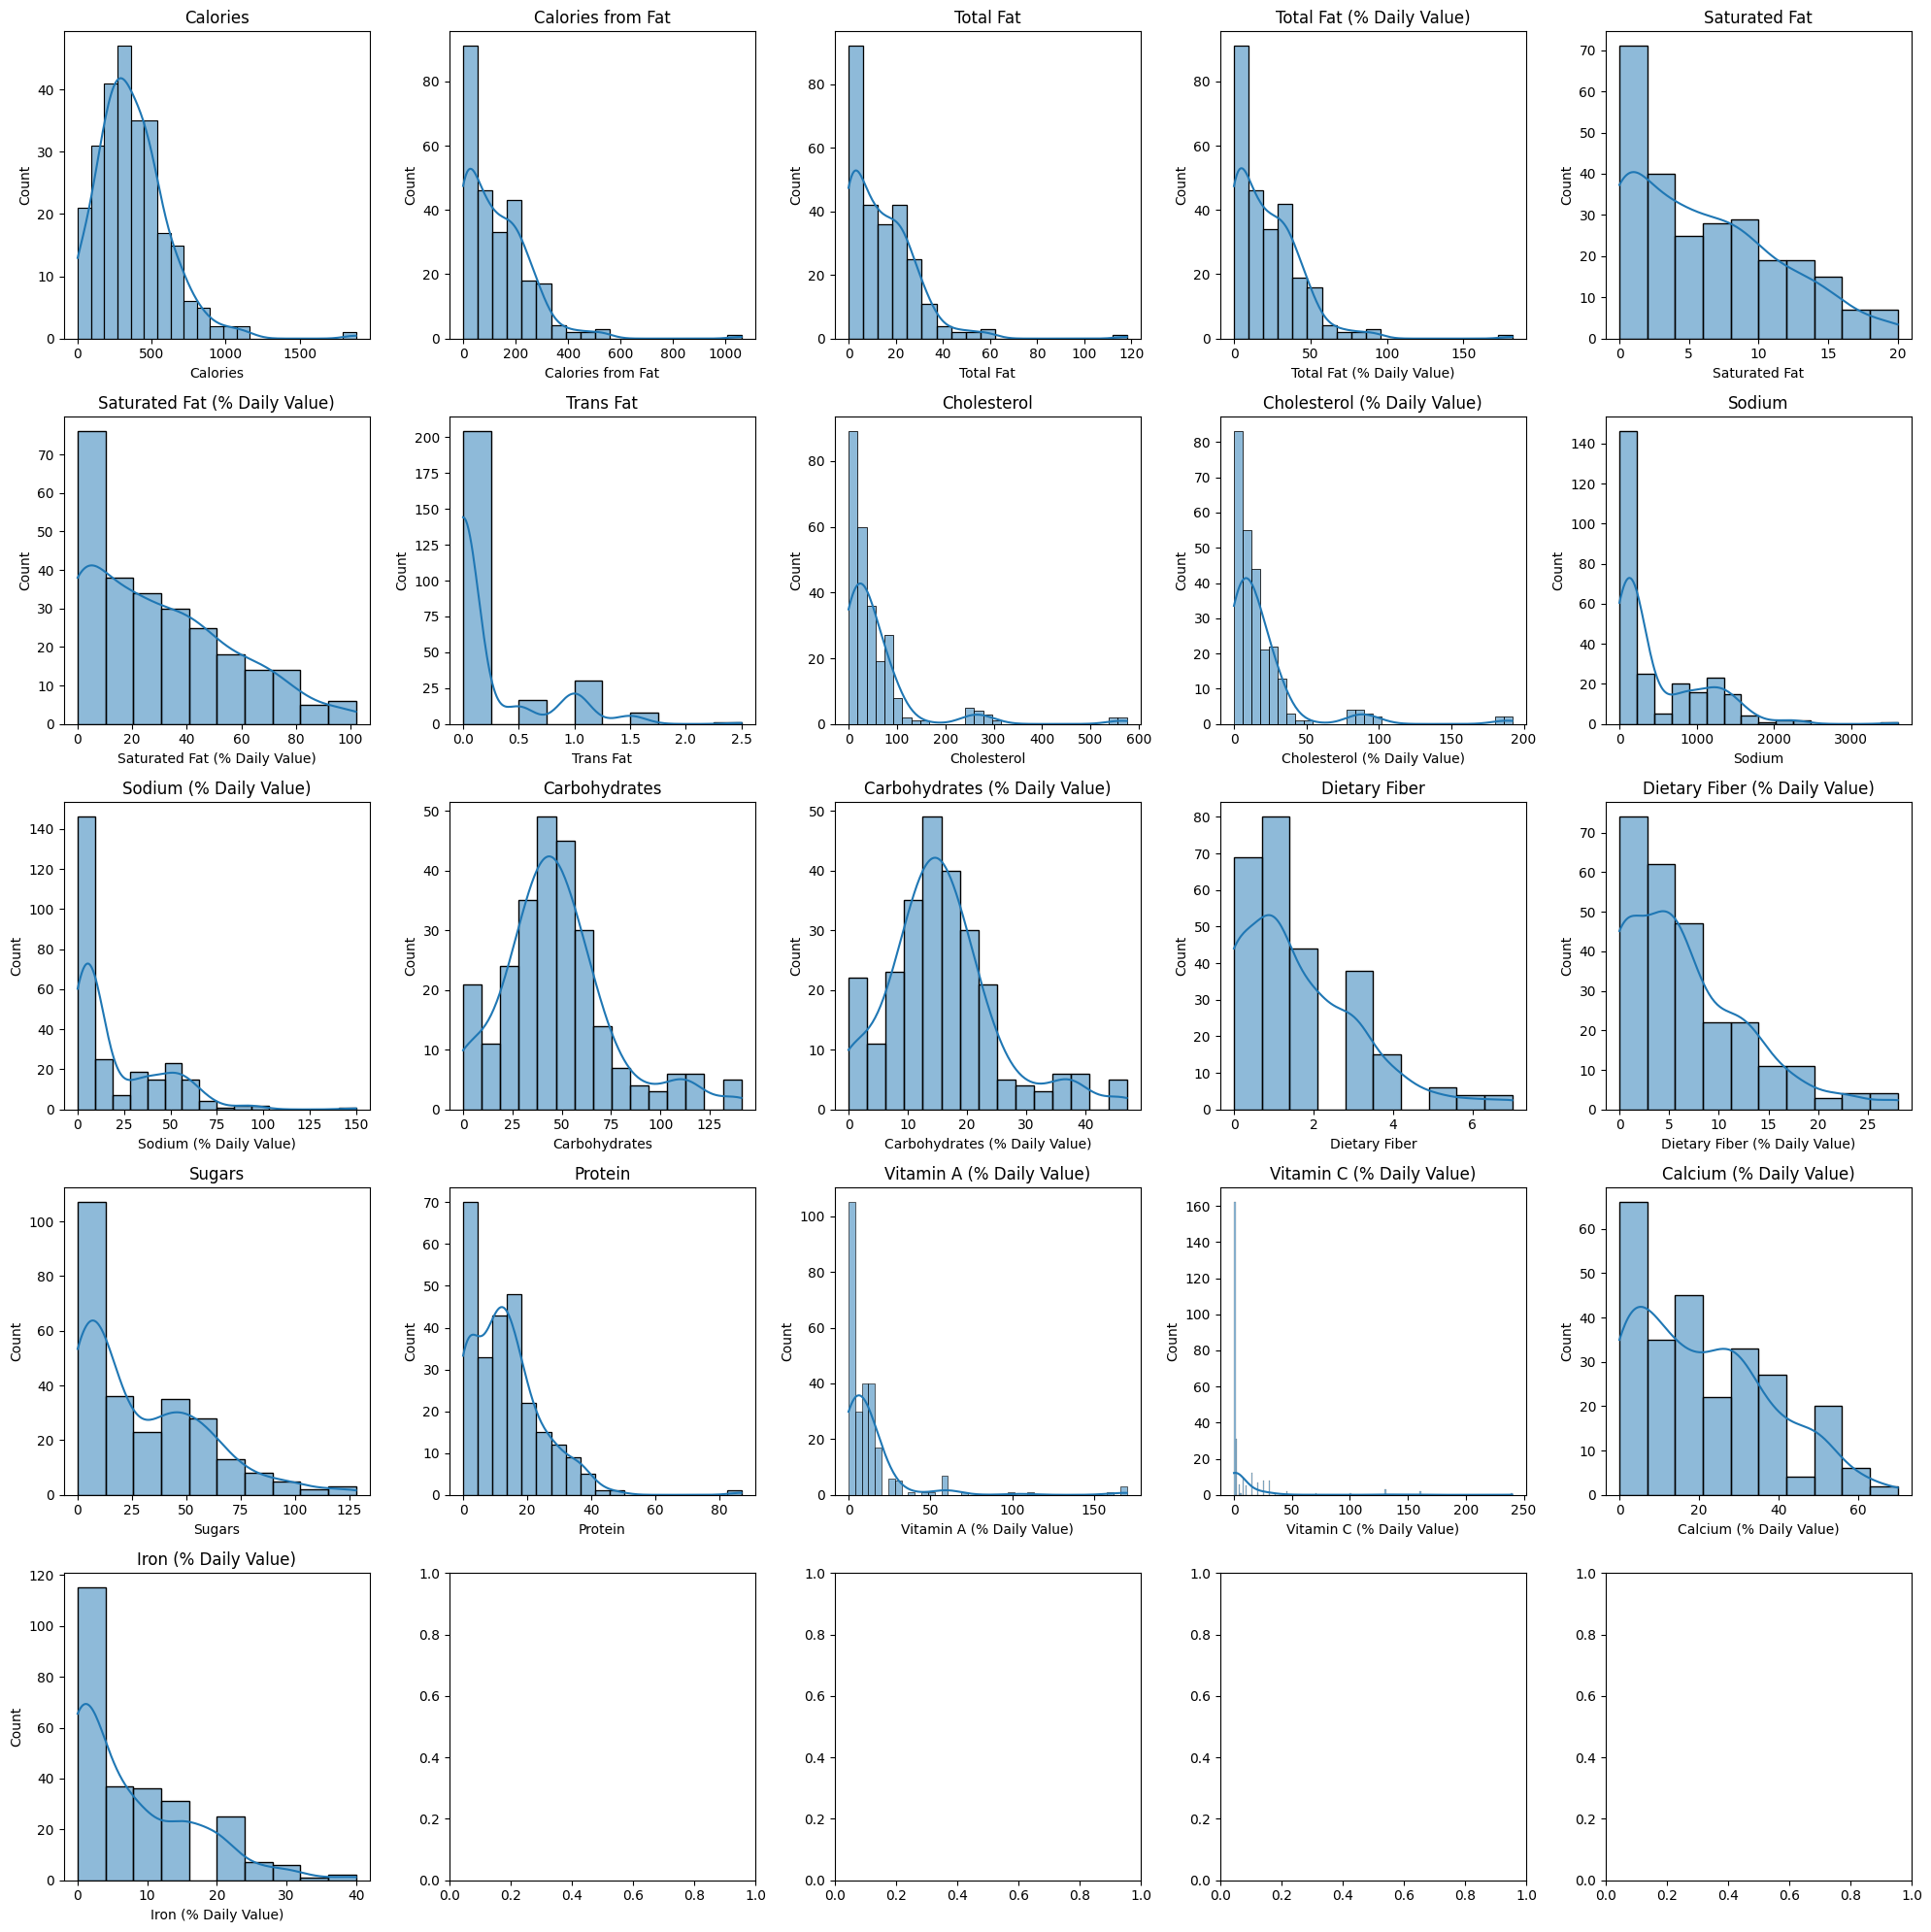

In [ ]:
# Step 1: Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Step 2: Define the Plotting Function
def plot_per_column_distribution(df, num_columns=5):
    num_rows = math.ceil(len(df.select_dtypes(include=['float64', 'int64']).columns) / num_columns)
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 4))
    for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
        row = i // num_columns
        col_idx = i % num_columns
        if num_rows > 1:
            ax = axes[row, col_idx]
        else:
            # This handles the case where there's only one row of plots
            ax = axes[col_idx]
        sns.histplot(df[col], ax=ax, kde=True)
        ax.set_title(col)
    plt.tight_layout()
    plt.show()

# Ensure you replace 'df1' with the actual DataFrame variable you wish to plot
# Example DataFrame creation (replace this with your actual DataFrame 'df1')
# df1 = pd.DataFrame({
#     'A': np.random.randn(100),
#     'B': np.random.randint(1, 100, 100),
#     'C': np.random.rand(100) * 100,
#     # Add more columns as needed
# })

# Step 3: Call the Function with your DataFrame
plot_per_column_distribution(df1, num_columns=5)


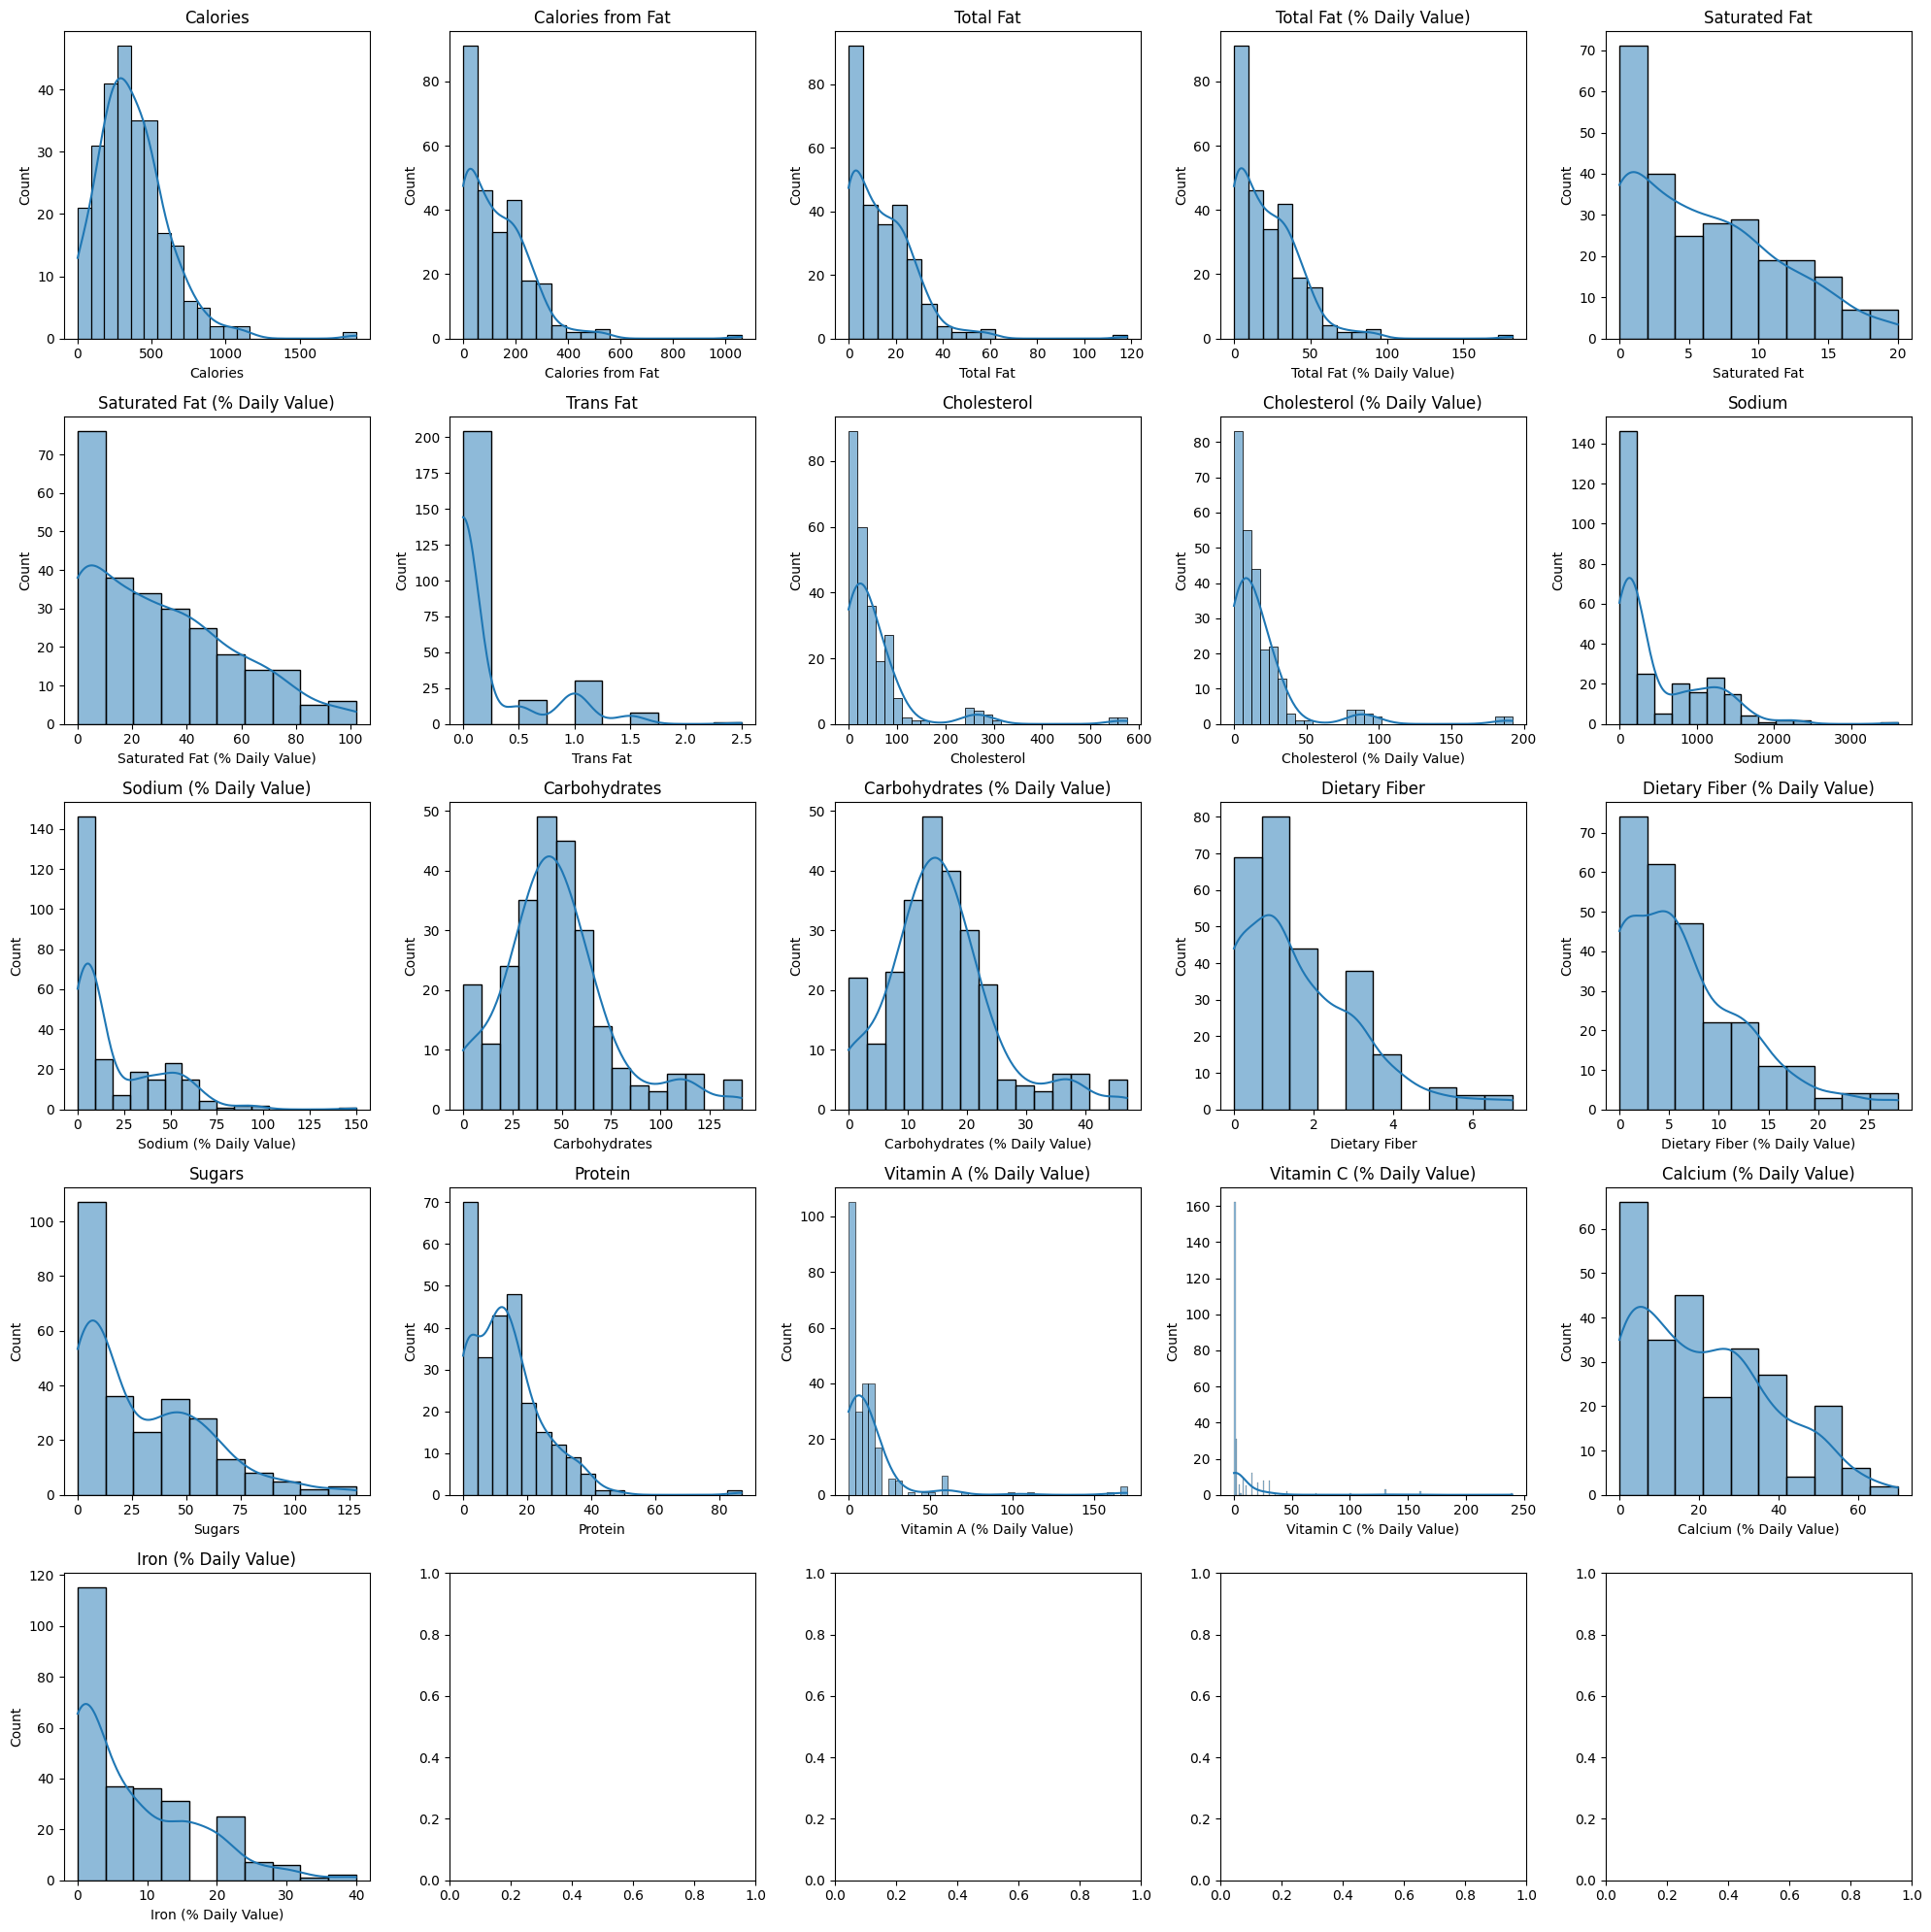

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_per_column_distribution(df, num_columns=5):
    num_rows = math.ceil(len(df.select_dtypes(include=['float64', 'int64']).columns) / num_columns)
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 4))
    for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
        row = i // num_columns
        col_idx = i % num_columns
        if num_rows > 1:
            ax = axes[row, col_idx]
        else:
            ax = axes[col_idx] if num_rows > 1 else axes[col_idx]
        sns.histplot(df[col], ax=ax, kde=True)
        ax.set_title(col)
    plt.tight_layout()
    plt.show()

# Replace 'df1' with your DataFrame
plot_per_column_distribution(df1, num_columns=5)


<ipython-input-26-a0343c621274>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
<ipython-input-26-a0343c621274>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


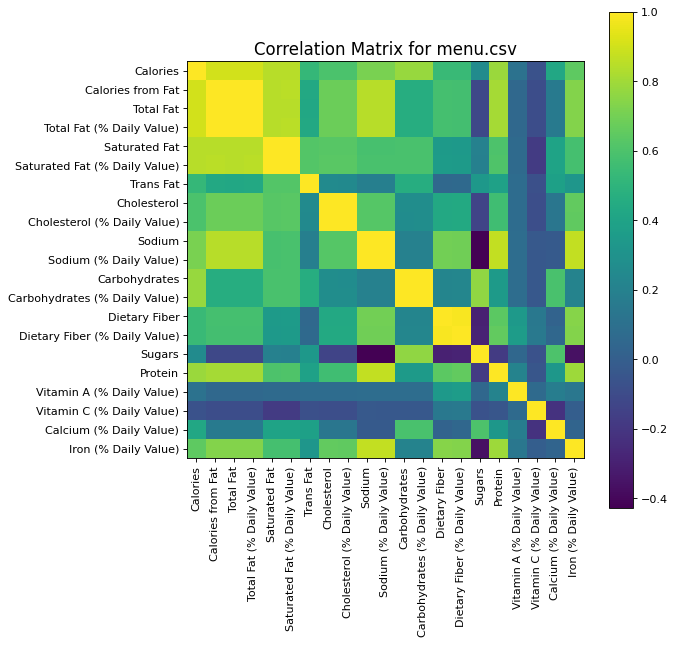

In [ ]:
plotCorrelationMatrix(df1, 8)

Mounted at /content/drive


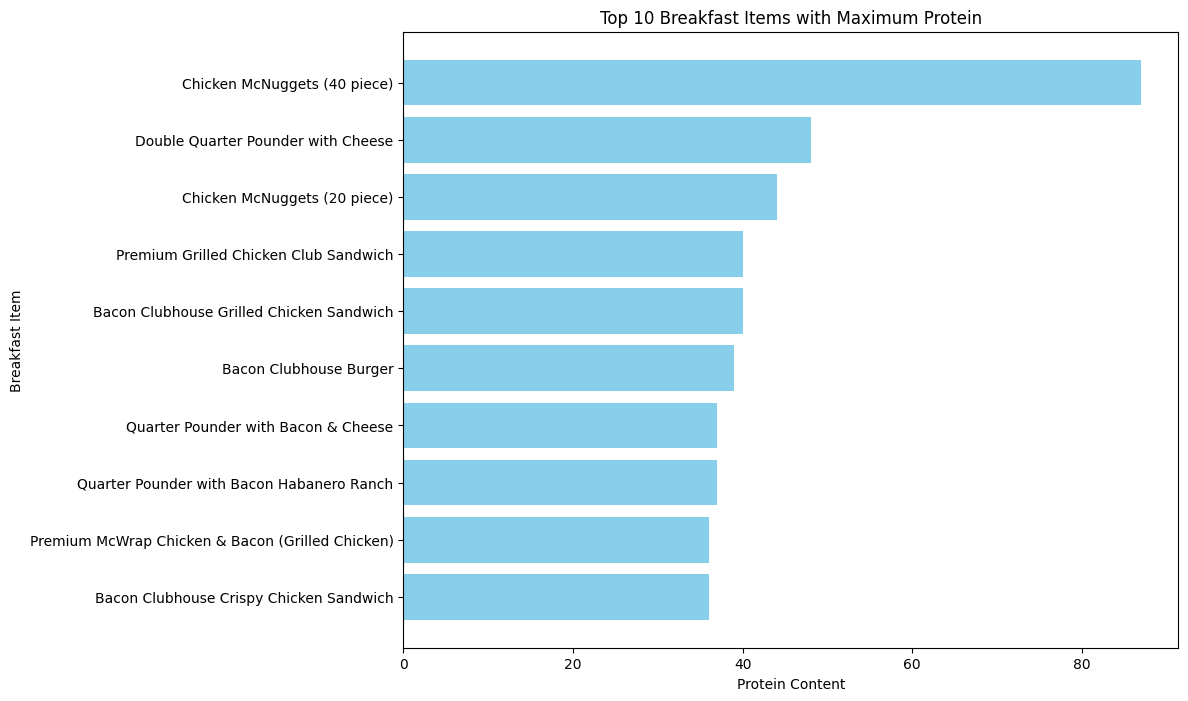

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Now you can use regular Python code to access files
# For example, to list files in a specific directory in your Google Drive:
import os

file_path = '/content/drive/My Drive/database/menu.csv'


# Load your CSV file
file_path = '/content/drive/My Drive/database/menu.csv'
# Update this to the path of your CSV file
data = pd.read_csv(file_path)

top_ten_protein = data.sort_values(by='Protein', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_ten_protein['Item'], top_ten_protein['Protein'], color='skyblue')
plt.xlabel('Protein Content')
plt.ylabel('Breakfast Item')
plt.title('Top 10 Breakfast Items with Maximum Protein')
plt.gca().invert_yaxis()  # Display the highest protein content at the top
plt.show()



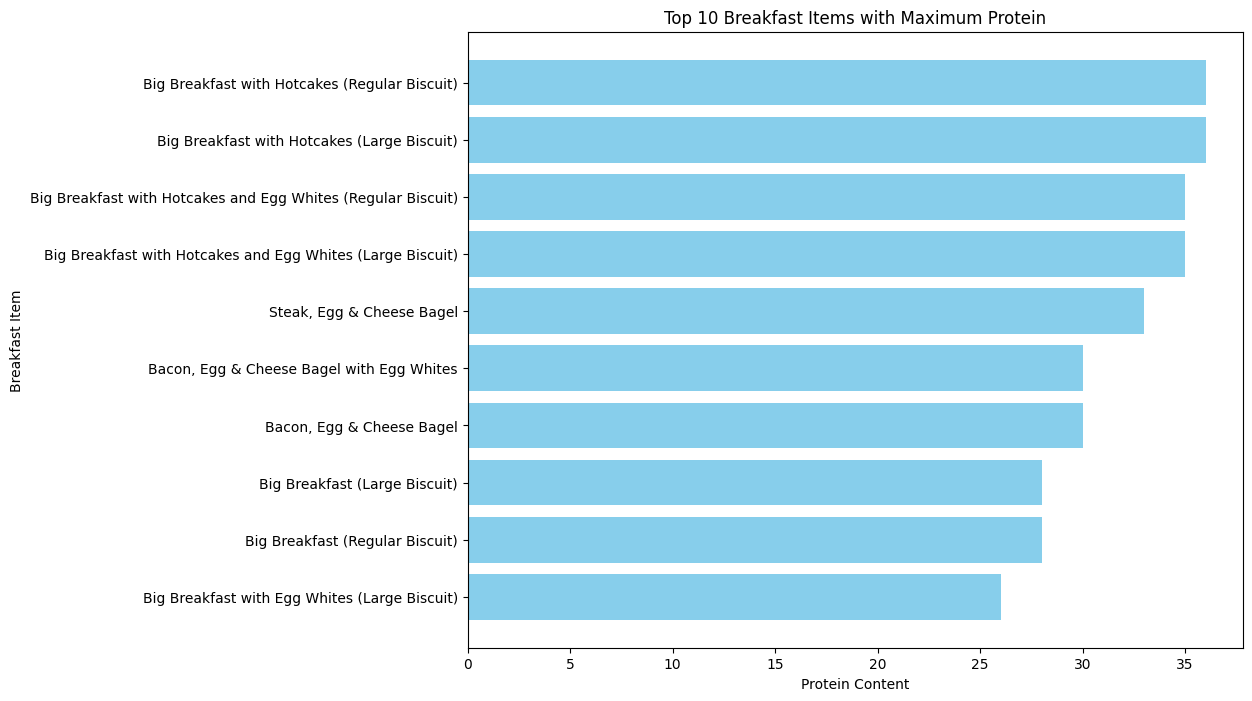

In [ ]:
# Filter for breakfast items assuming there's a "Category" column
breakfast_data = data[data['Category'] == 'Breakfast']

# Sort the breakfast items by 'Protein' in descending order to find the top ten items with the most protein
top_ten_breakfast_protein = breakfast_data.sort_values(by='Protein', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_ten_breakfast_protein['Item'], top_ten_breakfast_protein['Protein'], color='skyblue')
plt.xlabel('Protein Content')
plt.ylabel('Breakfast Item')
plt.title('Top 10 Breakfast Items with Maximum Protein')
plt.gca().invert_yaxis()  # Display the highest protein content at the top
plt.show()

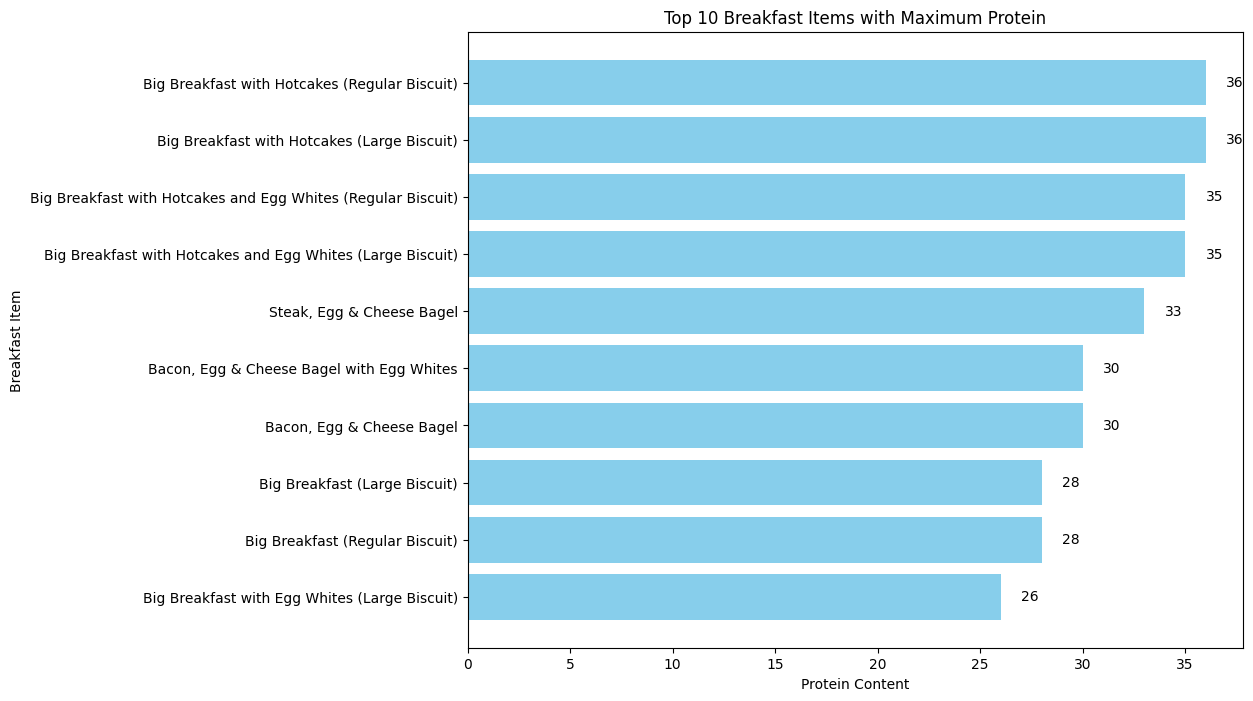

In [ ]:
# Assuming there's a 'Category' column and we're filtering for 'Breakfast'
breakfast_data = data[data['Category'] == 'Breakfast']

# Find the top ten breakfast items with the most protein
top_ten_breakfast_protein = breakfast_data.sort_values(by='Protein', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(top_ten_breakfast_protein['Item'], top_ten_breakfast_protein['Protein'], color='skyblue')

# Adding labels to each bar
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 1  # Adjust this value to move the label left or right
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, s=f'{width}', va='center')

plt.xlabel('Protein Content')
plt.ylabel('Breakfast Item')
plt.title('Top 10 Breakfast Items with Maximum Protein')
plt.gca().invert_yaxis()  # Display the highest protein content at the top
plt.show()

In [ ]:
print(data.columns)

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')


In [ ]:
import pandas as pd


# Filtering criteria based on provided standard nutritional values:
# - Protein: 10g to 30g
# - Total Fat: Less than 15g
# - Carbohydrates: 20g to 50g
# - Dietary Fiber: At least 5g
# - Vitamin C (% Daily Value): At least 20%
# - Calcium (% Daily Value): At least 10%

filtered_data = data[
    (data['Protein'] >= 10) & (data['Protein'] <= 30) &
    (data['Total Fat'] < 15) &
    (data['Carbohydrates'] >= 20) & (data['Carbohydrates'] <= 50) &
    (data['Dietary Fiber'] >= 5) &
    (data['Vitamin C (% Daily Value)'] >= 20) &
    (data['Calcium (% Daily Value)'] >= 10)
]

# Assuming each row in the dataset represents a unique food item,
# we'll sort the filtered dataset by Protein content to find high-protein healthy options.
top_ten_healthy_foods = filtered_data.sort_values(by='Protein', ascending=False).head(10)

# Display the top ten healthy foods
print(top_ten_healthy_foods[['Item', 'Protein', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)']])


                                            Item  Protein  Total Fat  \
89  Premium Southwest Salad with Grilled Chicken       27        8.0   

    Carbohydrates  Dietary Fiber  Vitamin C (% Daily Value)  \
89             28              7                         30   

    Calcium (% Daily Value)  
89                       15  


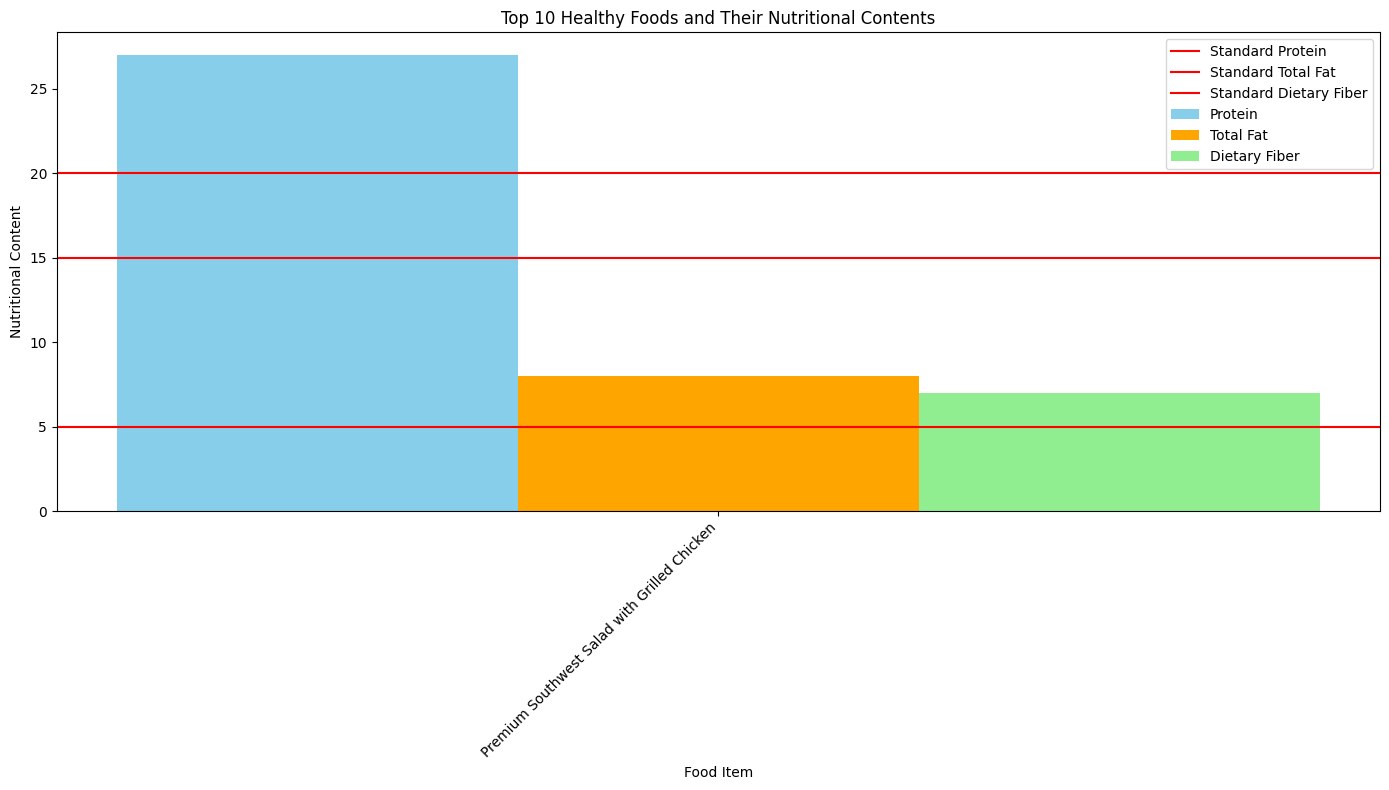

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'top_ten_healthy_foods' is already defined and contains the top 10 items
# Here are the standard values (for demonstration purposes, adjust as needed):
standard_values = {
    'Protein': 20,  # Standard protein value
    'Total Fat': 15,  # Standard total fat value
    'Dietary Fiber': 5,  # Standard dietary fiber value
}

# Setting up the figure and axes for the combined chart
fig, ax1 = plt.subplots(figsize=(14, 8))

# Generating indices for the X-axis
indices = np.arange(len(top_ten_healthy_foods))

# Bar width
width = 0.3

# Plotting bars for each nutritional content
bars1 = ax1.bar(indices - width, top_ten_healthy_foods['Protein'], width, label='Protein', color='skyblue')
bars2 = ax1.bar(indices, top_ten_healthy_foods['Total Fat'], width, label='Total Fat', color='orange')
bars3 = ax1.bar(indices + width, top_ten_healthy_foods['Dietary Fiber'], width, label='Dietary Fiber', color='lightgreen')

# Setting the X-axis labels to the item names
ax1.set_xticks(indices)
ax1.set_xticklabels(top_ten_healthy_foods['Item'], rotation=45, ha="right")

# Adding labels and title
ax1.set_xlabel('Food Item')
ax1.set_ylabel('Nutritional Content')
ax1.set_title('Top 10 Healthy Foods and Their Nutritional Contents')

# Overlaying standard values as horizontal lines
for nutrient, value in standard_values.items():
    ax1.axhline(y=value, color='r', linestyle='-', label=f'Standard {nutrient}')

# Adding a legend
ax1.legend()

plt.tight_layout()
plt.show()


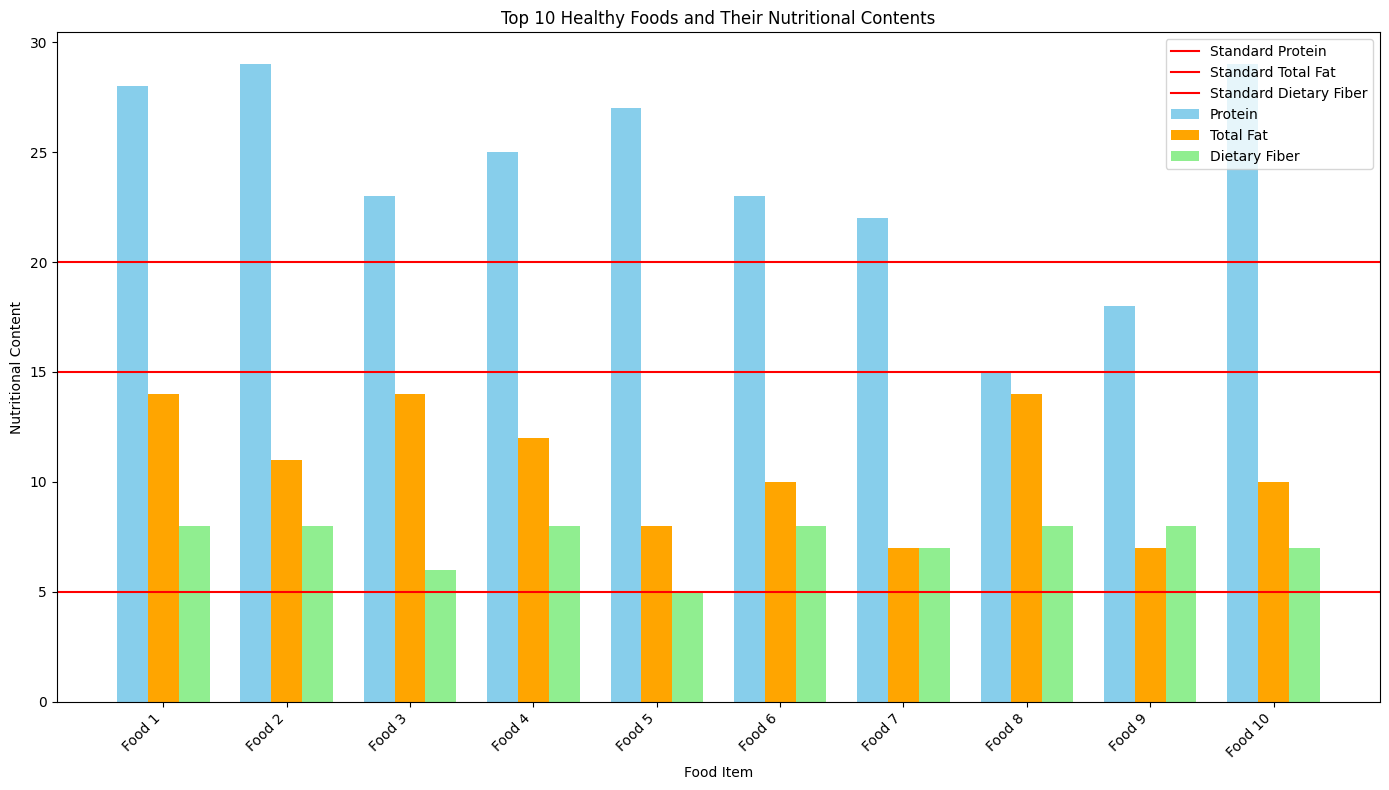

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example dataset of top ten healthy foods (replace this with your actual data frame)
top_ten_healthy_foods = pd.DataFrame({
    'Item': ['Food 1', 'Food 2', 'Food 3', 'Food 4', 'Food 5', 'Food 6', 'Food 7', 'Food 8', 'Food 9', 'Food 10'],
    'Protein': np.random.randint(10, 30, size=10),
    'Total Fat': np.random.randint(5, 15, size=10),
    'Dietary Fiber': np.random.randint(5, 10, size=10)
})

# Standard nutritional values
standard_values = {
    'Protein': 20,  # Example standard value for protein
    'Total Fat': 15,  # Example standard value for total fat
    'Dietary Fiber': 5,  # Example standard value for dietary fiber
}

# Setting up the figure for the combined chart
fig, ax = plt.subplots(figsize=(14, 8))

# Number of bars/groups
n_bars = len(top_ten_healthy_foods)
# The x locations for the groups
ind = np.arange(n_bars)
# The width of the bars
width = 0.25

# Plotting bars for each nutritional content
protein_bars = ax.bar(ind - width, top_ten_healthy_foods['Protein'], width, label='Protein', color='skyblue')
fat_bars = ax.bar(ind, top_ten_healthy_foods['Total Fat'], width, label='Total Fat', color='orange')
fiber_bars = ax.bar(ind + width, top_ten_healthy_foods['Dietary Fiber'], width, label='Dietary Fiber', color='lightgreen')

# Adding the standard values as lines across the chart
for nutrient, value in standard_values.items():
    ax.axhline(y=value, linestyle='-', color='red', label=f'Standard {nutrient}')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Food Item')
ax.set_ylabel('Nutritional Content')
ax.set_title('Top 10 Healthy Foods and Their Nutritional Contents')
ax.set_xticks(ind)
ax.set_xticklabels(top_ten_healthy_foods['Item'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd



# Adjusting filtering criteria to match the provided column names
filtered_data = data[
    (data['Protein'] >= 10) & (data['Protein'] <= 30) &
    (data['Total Fat'] < 15) &
    (data['Carbohydrates'] >= 20) & (data['Carbohydrates'] <= 50) &
    (data['Dietary Fiber'] >= 5) &
    (data['Vitamin C (% Daily Value)'] >= 20) &
    (data['Calcium (% Daily Value)'] >= 10)
]

# Calculating the Healthy_Score as the sum of criteria met
filtered_data['Healthy_Score'] = filtered_data.apply(
    lambda x: sum([
        10 <= x['Protein'] <= 30,
        x['Total Fat'] < 15,
        20 <= x['Carbohydrates'] <= 50,
        x['Dietary Fiber'] >= 5,
        x['Vitamin C (% Daily Value)'] >= 20,
        x['Calcium (% Daily Value)'] >= 10
    ]), axis=1)

# Selecting the top ten foods with the highest healthy scores
top_ten_healthy_foods = filtered_data.sort_values(by='Healthy_Score', ascending=False).head(10)

# Displaying the top ten healthy foods
print(top_ten_healthy_foods[['Item', 'Healthy_Score']])


                                            Item  Healthy_Score
89  Premium Southwest Salad with Grilled Chicken              6


<ipython-input-13-e702ffd6aeb5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Healthy_Score'] = filtered_data.apply(


In [ ]:
import pandas as pd

# Filtering based on nutritional criteria
filtered_data = data.loc[
    (data['Protein'] >= 10) & (data['Protein'] <= 30) &
    (data['Total Fat'] < 15) &
    (data['Carbohydrates'] >= 20) & (data['Carbohydrates'] <= 50) &
    (data['Dietary Fiber'] >= 5) &
    (data['Vitamin C (% Daily Value)'] >= 20) &
    (data['Calcium (% Daily Value)'] >= 10)
].copy()  # Using .copy() to explicitly create a copy and avoid SettingWithCopyWarning

# Calculating the Healthy_Score
filtered_data['Healthy_Score'] = filtered_data.apply(
    lambda x: sum([
        10 <= x['Protein'] <= 30,
        x['Total Fat'] < 15,
        20 <= x['Carbohydrates'] <= 50,
        x['Dietary Fiber'] >= 5,
        x['Vitamin C (% Daily Value)'] >= 20,
        x['Calcium (% Daily Value)'] >= 10
    ]), axis=1)

# Selecting the top ten foods with the highest healthy scores
top_ten_healthy_foods = filtered_data.sort_values(by='Healthy_Score', ascending=False).head(10)

# Displaying the top ten healthy foods
print(top_ten_healthy_foods[['Item', 'Healthy_Score']])


                                            Item  Healthy_Score
89  Premium Southwest Salad with Grilled Chicken              6


In [ ]:
# Adjusting the criteria slightly to potentially include more items
filtered_data = data.loc[
    (data['Protein'] >= 5) & (data['Protein'] <= 35) &  # Adjusted range
    (data['Total Fat'] < 20) &  # Adjusted maximum fat
    (data['Carbohydrates'] >= 15) & (data['Carbohydrates'] <= 60) &  # Adjusted range
    (data['Dietary Fiber'] >= 3) &  # Adjusted minimum fiber
    (data['Vitamin C (% Daily Value)'] >= 15) &  # Adjusted minimum Vitamin C
    (data['Calcium (% Daily Value)'] >= 8)  # Adjusted minimum Calcium
].copy()

# Calculate 'Healthy_Score' and select top ten as before
filtered_data['Healthy_Score'] = filtered_data.apply(
    lambda x: sum([
        5 <= x['Protein'] <= 35,
        x['Total Fat'] < 20,
        15 <= x['Carbohydrates'] <= 60,
        x['Dietary Fiber'] >= 3,
        x['Vitamin C (% Daily Value)'] >= 15,
        x['Calcium (% Daily Value)'] >= 9
    ]), axis=1)

top_ten_healthy_foods = filtered_data.sort_values(by='Healthy_Score', ascending=False).head(10)
print(top_ten_healthy_foods[['Item', 'Healthy_Score']])


                                                 Item  Healthy_Score
40                              Fruit & Maple Oatmeal              6
73   Premium McWrap Chicken & Ranch (Grilled Chicken)              6
87          Premium Southwest Salad (without Chicken)              6
89       Premium Southwest Salad with Grilled Chicken              6
77  Premium McWrap Chicken Sweet Chili (Grilled Ch...              5


In [ ]:
# Adjusting criteria to filter for "unhealthy" characteristics:
# - High in Saturated Fat
# - High in Sodium
# - High in Sugars
# - Low in Dietary Fiber
# - Low in Protein
unhealthy_criteria = (
    (data['Saturated Fat'] > 5) &  # Considered high if more than 5g
    (data['Sodium'] > 1000) &  # Considered high if more than 1000mg
    (data['Sugars'] > 20) &  # Considered high if more than 20g
    (data['Dietary Fiber'] < 3) &  # Considered low if less than 3g
    (data['Protein'] < 10)  # Considered low if less than 10g
)

# Filtering data based on the "unhealthy" criteria
unhealthy_data = data.loc[unhealthy_criteria].copy()

# We might score each food based on how many of the "unhealthy" criteria they meet
unhealthy_data['Unhealthy_Score'] = unhealthy_data.apply(
    lambda x: sum([
        x['Saturated Fat'] > 5,
        x['Sodium'] > 1000,
        x['Sugars'] > 20,
        x['Dietary Fiber'] < 3,
        x['Protein'] < 10
    ]), axis=1)

# Selecting the top ten foods with the highest "unhealthy" scores
top_ten_unhealthy_foods = unhealthy_data.sort_values(by='Unhealthy_Score', ascending=False).head(10)

# Displaying the top ten "unhealthy" foods
print(top_ten_unhealthy_foods[['Item', 'Unhealthy_Score']])


Empty DataFrame
Columns: [Item, Unhealthy_Score]
Index: []


In [ ]:
# Adjusting the criteria slightly to potentially include more items
filtered_data = data.loc[
    (data['Protein'] <= 5) & (data['Protein'] <= 35) &  # Adjusted range
    (data['Total Fat'] > 20) &  # Adjusted maximum fat
    (data['Carbohydrates'] <= 15) & (data['Carbohydrates'] <= 60) &  # Adjusted range
    (data['Dietary Fiber'] <= 3) &  # Adjusted minimum fiber
    (data['Vitamin C (% Daily Value)'] <= 15) &  # Adjusted minimum Vitamin C
    (data['Calcium (% Daily Value)'] <= 8)  # Adjusted minimum Calcium
].copy()

# Calculate 'Healthy_Score' and select top ten as before
filtered_data['unHealthy_Score'] = filtered_data.apply(
    lambda x: sum([
        5 <= x['Protein'] <= 35,
        x['Total Fat'] > 20,
        15 <= x['Carbohydrates'] <= 60,
        x['Dietary Fiber'] <= 3,
        x['Vitamin C (% Daily Value)'] <= 15,
        x['Calcium (% Daily Value)'] <= 9
    ]), axis=1)

top_ten_healthy_foods = filtered_data.sort_values(by='unHealthy_Score', ascending=False).head(10)
print(top_ten_healthy_foods[['Item', 'unHealthy_Score']])


Empty DataFrame
Columns: [Item, unHealthy_Score]
Index: []
